# Simple linear Regression on Salary of experienced employees  

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X

The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

## Import packages and dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('./Downloads/Salary_Data.csv')

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Check basic info of the data set

In [3]:
# 'info()' method to check the data types and number
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
# 'describe()' method to get the statistical summary of the various features of the data set
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

> - Given data has labels,so it's supervised 
>- The dependent variable has continuous numeric values ,then we need to  predict continuous values,so regression 

## Check for null and repeated values in dataset

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Basic plotting and visualization on the data set


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

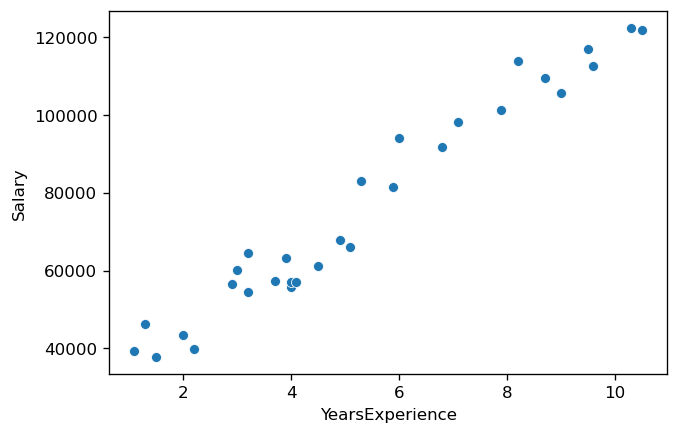

In [8]:
plt.figure(dpi=120)
sns.scatterplot(df.YearsExperience,df.Salary)

<AxesSubplot:ylabel='Salary'>

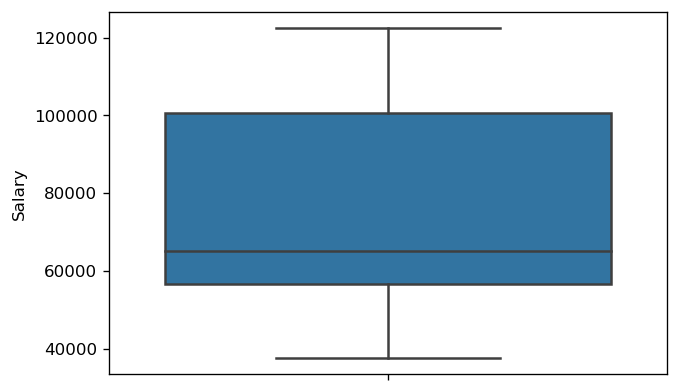

In [9]:
plt.figure(dpi=120)
sns.boxplot(y=df.Salary)

>- relation b/w independent and dependent values is linear soo simple linear regression 

## Make yearsofexperience as X(independent variable) and salary as y(dependent variable) for simple linear regression

In [10]:
X = df[['YearsExperience']].values
y = df[['Salary']].values

In [11]:
print('Independent shape :',X.shape)
print('Dependent shape :',y.shape)

Independent shape : (30, 1)
Dependent shape : (30, 1)


## Test-train split

### Import train_test_split function from scikit-learn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
print('Training feature shape : ',X_train.shape)
print('Training variable shape : ',y_train.shape)
print('Testing feature shape : ',X_test.shape)
print('Testing variable shape : ',y_test.shape)

Training feature shape :  (21, 1)
Training variable shape :  (21, 1)
Testing feature shape :  (9, 1)
Testing variable shape :  (9, 1)


## Model fit and training

### Import linear regression model estimator from scikit-learn and instantiate

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
reg = LinearRegression()  #Creating a Linear Regression object 'reg'

### Fit the model on to the instantiated object itself

In [17]:
reg.fit(X_train,y_train)    #Fit the linear model on to the 'reg' object itself i.e. no need to set this to another variable

LinearRegression()

In [18]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

### Check the intercept and coefficient

In [19]:
print('The intercept term of the linear model :',reg.intercept_)  #b or c

The intercept term of the linear model : [25918.43833489]


In [20]:
print('The coefficients of the linear model :',reg.coef_)   #w or m 

The coefficients of the linear model : [[9339.08172382]]


## Prediction, error estimate and accuracy of model

### Prediction using the reg model

In [21]:
predictions = reg.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (9, 1)


In [22]:
reg.predict([[3]])            # predict for new individual experience entry

array([[53935.68350634]])

### Plot to see the predictions related to the training data

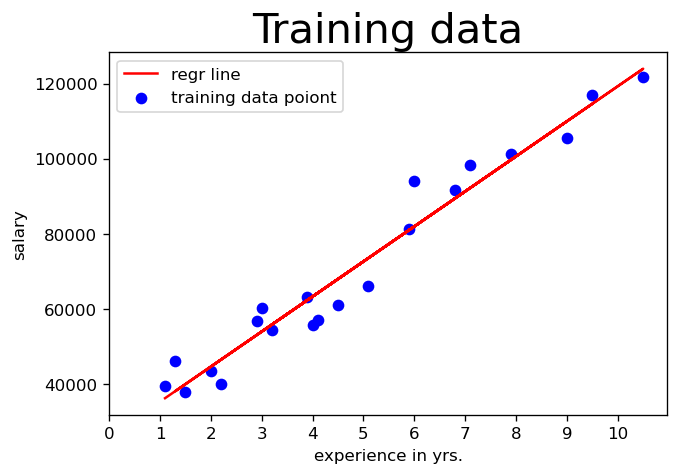

In [23]:
plt.figure(dpi=120)
plt.title('Training data',fontsize=25)
plt.scatter(X_train,y_train,color='blue',label='training data poiont')
plt.plot(X_train,reg.predict(X_train),color='red',label='regr line')
plt.xticks(range(0,11))
plt.xlabel('experience in yrs.')
plt.ylabel('salary')
plt.legend()

### Plot to see the predictions related to the testing data

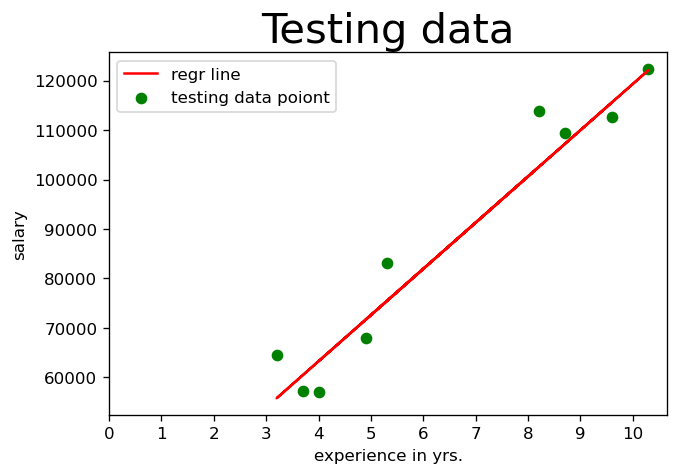

In [24]:
plt.figure(dpi=120)
plt.title('Testing data',fontsize=25)
plt.scatter(X_test,y_test,color='green',label='testing data poiont')
plt.plot(X_test,reg.predict(X_test),color='red',label='regr line')
plt.xticks(range(0,11))
plt.xlabel('experience in yrs.')
plt.ylabel('salary')
plt.legend()

### Plot to see the predictions related to the total data

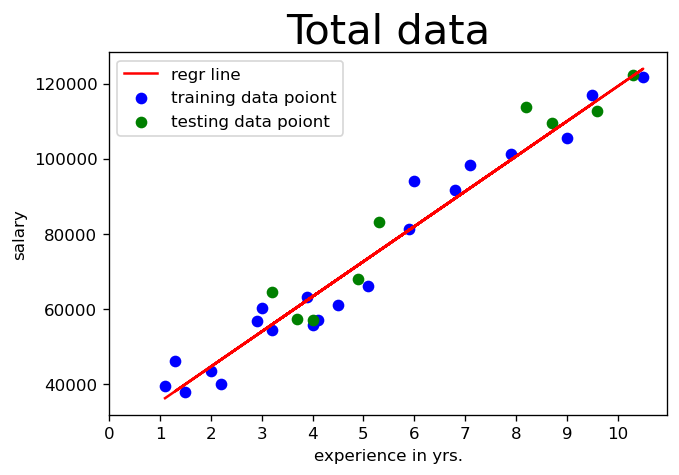

In [25]:
plt.figure(dpi=120)
plt.title('Total data',fontsize=25)
plt.scatter(X_train,y_train,color='blue',label='training data poiont')
plt.scatter(X_test,y_test,color='green',label='testing data poiont')
plt.plot(X_train,reg.predict(X_train),color='red',label='regr line')
plt.xticks(range(0,11))
plt.xlabel('experience in yrs.')
plt.ylabel('salary')
plt.legend()

### Creating a dataframe to see the actual values and predicted values of testing data

In [26]:
c1 = X_test.ravel()
c2 = y_test.ravel()
c3 = reg.predict(X_test).ravel()
df2 = pd.DataFrame({'Years_of_experience' : c1,'Actual_Values' : c2, 'Predicted_Values' : c3})
df2

,Years_of_experience,Actual_Values,Predicted_Values
0,9.6,112635.0,115573.622884
1,4.9,67938.0,71679.938782
2,8.2,113812.0,102498.908470
3,5.3,83088.0,75415.571471
4,3.2,64445.0,55803.499851
5,3.7,57189.0,60473.040713
6,10.3,122391.0,122110.980090
7,8.7,109431.0,107168.449332
8,4.0,56957.0,63274.765230


### Calculating the errors

In [27]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 5161.328710400183
Mean square error (MSE): 37784662.46621314
Root mean square error (RMSE): 6146.92300799458


### R-square value

In [28]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))


R-squared value of predictions: 0.941


In [29]:
print('The model accuracy score for testing data :',round(reg.score(X_test,y_test),3))

# reg.score:calculate predictions for X_test and check with y_test

print('The model accuracy score for training data :',round(reg.score(X_train,y_train),3))

# reg.score:calculate predictions for X_train and check with y_train


The model accuracy score for testing data : 0.941
The model accuracy score for training data : 0.957
